**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*3A_EDA_Python* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: February 8, 2020 <br>
Date Updated: February 17, 2020

____

**Run R and Python in the same notebook** <br>
Docs: https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook

----

In [1]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

----

**Load Packages**

In [2]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import pendulum
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

from matplotlib.offsetbox import AnchoredText
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
#import fbprophet

import warnings
import itertools

from flask import jsonify, make_response

from varname import varname

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF
from PIL import Image, ImageDraw, ImageFont

In [3]:
# Create function 'jprint'

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

----

**Load Data**

In [4]:
analysis_df = pd.read_csv('../../2_Inputs/Final/analysis_df.csv')
analysis_df = analysis_df.drop(["Unnamed: 0"], axis = 1)
analysis_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,32.446,7.45,2.798308,NaN,NaN
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,32.962,7.45,2.808131,NaN,NaN
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,-20000.0,NaN,33.471,7.45,2.804113,NaN,NaN
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,33.971,7.45,2.786171,NaN,NaN
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,NaN,NaN,NaN,NaN,NaN,34.463,7.45,2.754223,NaN,NaN


----

**Summary Statistics**

In [5]:
# Give Summary Statistics for all variables

analysis_df.describe()

,date,longitude,latitude,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
count,13041.000000,12660.000000,12660.000000,183.000000,184.000000,3213.000000,4937.000000,4912.000000,4937.000000,427.000000,...,5610.000000,5610.000000,5423.000000,2.316000e+03,2946.000000,11329.000000,11348.000000,11379.000000,537.000000,4057.000000
mean,1989.530941,19.139549,18.889009,213.220938,249.743743,60.911214,80.084418,73.702188,89.877098,54.002821,...,67.144735,68.253339,8.223790,1.117444e+00,12.516735,64.000279,4.026289,6.307149,19.984810,-0.014353
std,17.323939,70.226841,24.154391,706.217492,819.333180,38.361981,30.212200,36.455322,19.146415,30.441477,...,10.706430,20.045417,6.271067,5.493299e+05,12.215795,11.454812,2.020720,4.363844,9.291863,0.999877
min,1960.000000,-175.216000,-41.286500,0.213618,0.278870,0.150000,0.010000,0.000000,3.500000,0.404912,...,33.175999,8.221749,0.140000,-5.386986e+06,2.500000,18.907000,0.860000,0.685592,1.700000,-2.313395
25%,1975.000000,-15.180400,4.174200,1.043520,1.196175,19.610000,67.449181,46.039815,89.851267,27.730721,...,61.025999,57.556690,3.637500,-8.114025e+04,2.500000,55.907000,2.131000,3.159234,12.500000,-0.844184
50%,1990.000000,19.259500,17.300000,4.021715,4.720526,77.330000,99.300000,98.858137,99.889076,50.019794,...,68.415001,72.665871,6.693000,-6.035000e+03,7.500000,67.134000,3.627500,4.319188,19.100000,0.020428
75%,2005.000000,50.535400,40.049500,85.896649,104.430728,97.280000,100.000000,100.000000,100.000000,82.193237,...,73.943001,82.591821,11.160000,2.705850e+04,18.300000,72.618000,5.951000,8.567107,27.000000,0.904892
max,2019.000000,179.089567,64.183600,5558.088679,6363.125307,100.000000,100.000000,100.000000,100.000000,100.000000,...,91.542000,108.217974,37.939999,8.859954e+06,71.500000,85.417073,8.864000,27.576370,55.900000,1.800992


In [6]:
# Count the number of unique countries

np.count_nonzero(np.unique(analysis_df["country"]))

218

In [7]:
# Count the number of unique countries

np.count_nonzero(np.unique(analysis_df["date"]))

61

In [8]:
# Count the number of variables

np.count_nonzero(analysis_df.columns)

2361

----

**Visualize Missing Values** <br>
Docs R: https://cran.r-project.org/web/packages/naniar/vignettes/naniar-visualisation.html <br>
Docs Python: https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

In [9]:
# Info

analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13042 entries, 0 to 13041
Columns: 2361 entries, country to Voice.and.Accountability..Estimate.y
dtypes: float64(2353), object(8)
memory usage: 234.9+ MB


In [15]:
analysis_df["Access to electricity, rural (% of rural population)"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Access to electricity, rural (% of rural population), dtype: float64

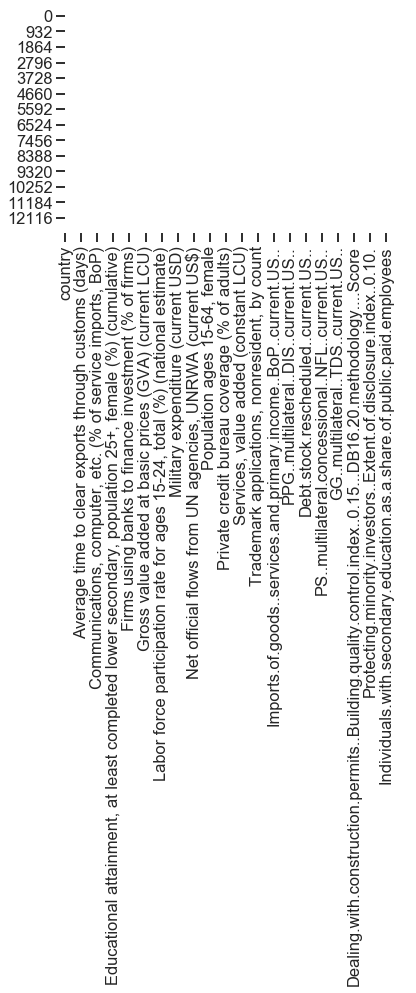

In [13]:
# Heatmap of missingness 

missing_plot1 = sns.heatmap(analysis_df.isnull(), cbar=False)
#missing_plot1 = missing_plot1.get_figure()
#missing_plot1.savefig("../../3_Outputs/Missing Data Visualizations/Missing Data Visualization - All.jpg")

In [34]:
%%R -i analysis_df -w 5 -h 5 --units in -r 200

## Visualize all missing data

# Load relevant libraries

library(plyr)
library(dplyr)
library(tidyverse)
library(stringr)
library(readxl)
library(data.table)
library(reshape2)
library(hablar)
library(naniar)
library(DataCombine)
library(panelaggregation)

#jpeg("../../3_Outputs/Missing Data Visualizations/Missing Data Visualization - All.jpg", width = 1500, height = 1500)
#vis_miss(analysis_df, warn_large_data = FALSE) # too large
#dev.off()

AttributeError: 'float' object has no attribute 'encode'